In [23]:
import sys
sys.path.append('/Users/albertsmith/Documents/GitHub')
from pyRelaxSim import *
from numpy import pi
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 22})
from time import time

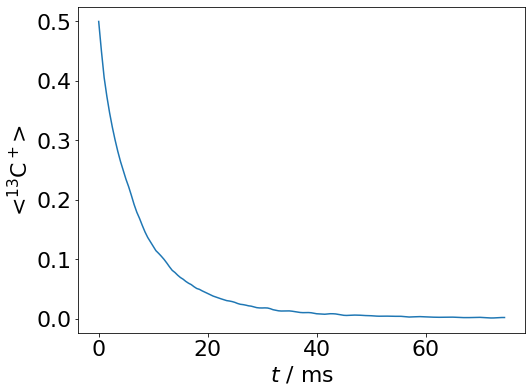

In [34]:
#Define the spin system/experimental conditions
ex0=ExpSys(v0H=600,vr=60000,Nucs=['13C','1H'])    
#Add a dipole coupling
ex0.set_inter('dipole',i0=0,i1=1,delta=44000)  
#Copy system for second set of conditions in exchange
ex1=ex0.copy()
#Replace original dipole with tilted dipole
ex1.set_inter('dipole',i0=0,i1=1,delta=44000,euler=[0,pi*15/180,0]) 

#Liovillian with exchange between two states
L=Liouvillian((ex0,ex1))                          
#Two-site exchange matrix
L.kex=Tools.twoSite_kex(1e-6)                     

#Sequence object (allows pulses)
seq=L.Sequence()
#Simple pulse sequence (just constant field along x)
seq.add_channel(channel='13C',v1=35000)               

#Propagator for 30 rotor cycles (0.5 ms)
U=seq.U()**30                                     

#Start on 13C x-axis, detect on 13Cx
rho=Rho(rho0='13Cx',detect='13Cp') 
#Apply propagator/detect 150 times
rho.DetProp(U,n=150) 
ax=rho.plot(axis='ms')
ax.figure.set_size_inches([8,6])